In [3]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Power method problem

1. Implement the power method in Python. I've included my starter code below.
2. Sometimes you'll notice that the power method fails to converge to the correct solution. What is special about randomly-sampled matrices where this occurs? How does the direction of the starting vector affect the time it takes to reach a solution? 
2. Suppose that we interpret a given linear matrix $X$ as describing a discrete-time linear dynamical system, $\v{y}_{t+1} = X \v{y}_t$. What kind of dynamics does the power method exhibit? What about the pathological cases you discussed in the previous solution?
5. The power method represents a basic optimization problem, where we are searching for a convergent solution. We saw that our method occasionally fails to find the correct solution. One way to improve our optimization would be to add a momentum term of the form $$\v{y}_t \leftarrow \gamma \v{y}_{t - 1} + (1 - \gamma) \dfrac{X \v{y}_{t - 1}} { \left| X \v{y}_{t - 1} \right|} .$$ Where $\gamma \in (0, 1]$. How would you modify your implementation of the power method, in order to allow momentum? What kinds of pathological dynamics would the momentum term help us avoid?
6. Similar to the momentum term, there is also a way to add damping to the update rule. What kinds of dynamics would that help us avoid?

## 1. 

In [4]:
import warnings
class SpectralDecompositionPowerMethod:
    """
    Store the output vector in the object attribute self.components_ and the 
    associated eigenvalue in the object attribute self.singular_values_ 
    
    Why this code structure and attribute names? We are using the convention used by 
    the popular scikit-learn machine learning library:
    https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

    Parameters
        max_iter (int): maximum number of iterations to for the calculation
        tolerance (float): fractional change in solution to stop iteration early
        gamma (float): momentum parameter for the power method
        random_state (int): random seed for reproducibility
        store_intermediate_results (bool): whether to store the intermediate results as
            the power method iterates
        stored_eigenvalues (list): If store_intermediate_results is active, a list of 
            eigenvalues at each iteration
        stored_eigenvectors (list): If store_intermediate_results is active, a list of
            eigenvectors at each iteration
    
    """
    def __init__(self, 
        max_iter=1000, 
        tolerance=1e-5, 
        gamma=0.0,
        random_state=None, 
        store_intermediate_results=False
    ):
        self.max_iter = max_iter
        self.tolerance = tolerance
        self.gamma = gamma
        np.random.seed(random_state)
        self.store_intermediate_results = store_intermediate_results 
        
        if store_intermediate_results is True:
            self.intermediate_results = []
            self.stored_eigenvalues = []
            self.stored_eigenvectors = []
    
    def fit(self, A):
        """
        Perform the power method with random initialization, and optionally store
        intermediate estimates of the eigenvalue and eigenvectors at each iteration.
        You can add an early stopping criterion based on the tolerance parameter.
        """

        size = len(A)
 
        temp = np.random.rand(size)
        v_old = temp / np.linalg.norm(temp)
        v_new = np.matmul(A, v_old)

        if self.store_intermediate_results is False:
            while np.max(np.abs(np.subtract(v_new, v_old)) ) > self.tolerance:
                v_old = v_new
                v_new = np.random.rand(size)
                v_new = np.dot(A, v_new / np.linalg.norm(v_new))
        else:
            while np.max( np.abs( np.subtract(v_new, v_old) ) ) > self.tolerance:
                v_old = v_new
                v_new = np.matmul(A, v_old)

                v_new = v_new / np.linalg.norm(v_new) 
                
                eigenvalue = np.dot(v_new, np.matmul(A, v_new)) / np.dot(v_new, v_new)

                self.stored_eigenvectors.append(v_new)
                self.stored_eigenvalues.append(eigenvalue)

Power method solution: [0.05060391529968143, 0.050547052753403154, 0.050538578870008524, 0.05053994431109615, 0.05054003570703953, 0.050540057398572286, 0.05054006581106735]
Numpy solution: 0.05054006611716966


Text(0, 0.5, 'Power method eigenvector')

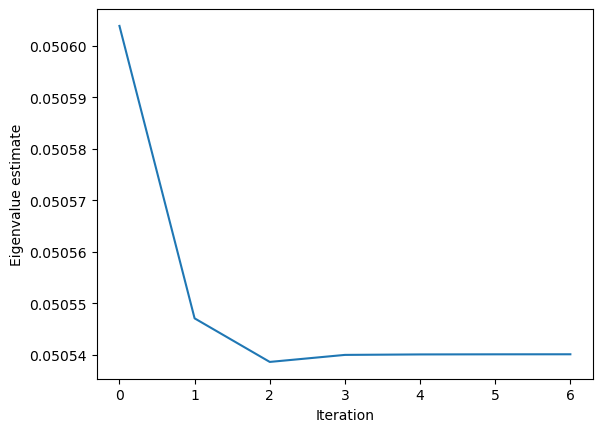

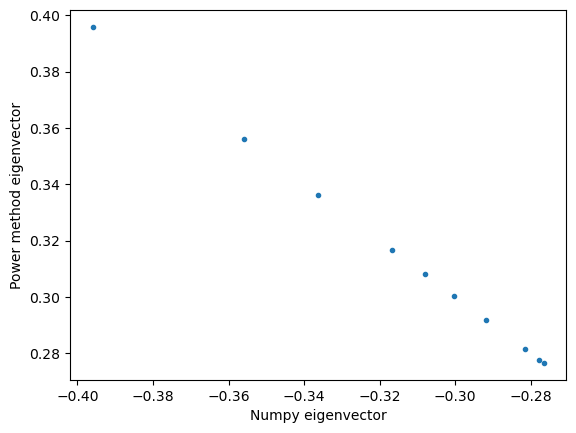

In [9]:
## Use the default eigensystem calculator in numpy as a point of comparison
def eigmax_numpy(A):
    """
    Compute the maximum eigenvalue and associated eigenvector in a matrix with Numpy.
    """
    eigsys = np.linalg.eig(A)
    ind = np.abs(eigsys[0]).argmax()
    return np.real(eigsys[0][ind]), np.real(eigsys[1][:, ind])
    
#  If I sample my matrices from a normal distribution these matrices fail to converge
mm = np.random.random(size=(10, 10)) / 100
model = SpectralDecompositionPowerMethod(store_intermediate_results=True)
model.fit(mm);


print(f"Power method solution: {model.stored_eigenvalues}")
print(f"Numpy solution: {eigmax_numpy(mm)[0]}")

plt.figure()
plt.plot(model.stored_eigenvalues)
plt.xlabel("Iteration")
plt.ylabel("Eigenvalue estimate")

plt.figure()
plt.plot(eigmax_numpy(mm)[1], model.stored_eigenvectors[-1], '.')
plt.xlabel("Numpy eigenvector")
plt.ylabel("Power method eigenvector")

## 2.

There's a couple issues that could happen based on our matrix. Since the power method converges to the largest eigenvalue, we need this eigenvalue to be helpful: if it's incredibly close to being zero then it could take a very long time to converge to a reasonable guess and even then that guess could be pretty bad. It would also be helpful if the eigenvalue wasn't too large as this could again lead to the method producing an eigenvector that's very large. We also rely on our initial guess vector to have some component pointing in the direction of the eigenvector associated with the largest eigenvalue, if this isn't true and we're just initially pointing in a completely different direction then the power method will converge to the second largest eigenvalue (again dependent on if we have a component in this direction.) 

## 3.

## 4.

## 5.

# Unsupervised learning problem

+ Explore the included von Karman datasets using the code below. What symmetries are present in the data? Do any symmetries change as we increase the Reynolds number?
+ Implement Principal Component Analysis in Python. I have included my outline code below; we are going to use multiple inheritence in order to make our implementation compatible with standard conventions for machine learning in Python. You can use numpy's built-in eigensystem solvers `np.linalg.eig` and `np.linalg.eigh`
+ Plot the eigenvalues of the data covariance matrix in descending order. What does this tell us about the effective dimensionality, and thus optimal number of features, to use to represent the von Karman dataset?
+ Try re-running your analysis using datasets from different Reynolds numbers. How does the effective dimensionality of the problem change as Reynolds number increases?
+ For this problem, the principal components often appear in pairs. Can you think of a reason for this?
+ What happens if we don't subtract the feature-wise mean before calculating PCA?
+ In Fourier analysis, we project a function onto linear combination of trigonometric basis functions. How is this related to principal component analysis?


## 1. 

In [14]:
Re = 600 # Reynolds number, change this to 300, 600, 900, 1200

# Load the two-dimensional velocity field data. Data is stored in a 4D numpy array,
# where the first dimension is the time index, the second and third dimensions are the
# x and y coordinates, and the fourth dimension is the velocity components (ux or uv).
vfield = np.load(
    f"/Users/swilliamson/Documents/GitHub/comp_physics_sw/hw/resources/vortex_street_data/vortex_street_velocities_Re_{Re}_largefile.npz", 
    allow_pickle=True
)
print("Velocity field data has shape: {}".format(vfield.shape))

# Calculate the vorticity, which is the curl of the velocity field
vort_field = np.diff(vfield, axis=1)[..., :-1, 1] + np.diff(vfield, axis=2)[:, :-1, :, 0] 

Velocity field data has shape: (3000, 256, 128, 2)


In [15]:
## Make an interactive video (optional; requires ipywidgets and has some RAM overhead)

from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as widgets

def plotter(i):
    # plt.close()
    fig = plt.figure(figsize=(10, 10))
    vscale = np.percentile(np.abs(vort_field[i]), 98)
    plt.imshow(
        vort_field[i],
        vmin=-vscale, vmax=vscale, cmap="RdBu"
    )
    plt.show()
interact(
    plotter, 
    i=widgets.IntSlider(0, 0, len(vort_field) - 1, 1, layout=Layout(width='500px'))
)

interactive(children=(IntSlider(value=0, description='i', layout=Layout(width='500px'), max=2999), Output()), …

<function __main__.plotter(i)>

When the Reynold's number is low (so the fluid is more viscous), after splitting around the cylinder the fluid nicely recombines behind it, giving us symmetry from left to right. But as we increase the Reynold's number (make the fluid more fluid-y) this symmetry breaks, it seems to happen somewhere between $R = 600$ and $R = 900$. At $R = 600$ we still almost have that left-right symmetry, but by $900$ the vortices created by the cylinder don't seem to behave in a periodic way. 